In [23]:
# Building a Simple Trading System
# The following system will be trading when the 9 Day moving average crossess the 21 Day moving average
# At the end we will test if following the system is more profitable than a buy and hold approach
# -created by Nicolas 25/05/11


In [24]:
# importing libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
# getting the data
ticker = ['ADA-USD']
start_date = '2020-01-01'
ada_data = pdr.get_data_yahoo(ticker, start_date)

In [26]:
# check
ada_data.tail(3)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD
Date,,,,,,
2021-05-23,1.549485,1.549485,1.597913,1.270361,1.316236,7.365908e+09
2021-05-24,1.555369,1.555369,1.648563,1.439744,1.550373,5.723131e+09
2021-05-26,1.731458,1.731458,1.827572,1.564877,1.570216,6.229799e+09


In [27]:
# modify the dataframe
ada_data = ada_data.drop('Adj Close', axis = 1)
ada_data = round(ada_data, 2)

In [28]:
# calculating log change
ada_data['Change'] = np.log(ada_data['Close']/ada_data['Close'].shift())
# calculating the 9 day moving average
ada_data['9D MA'] = ada_data['Close'].rolling(9).mean().shift()
# calculating the 9 day moving 
ada_data['21D MA'] = ada_data['Close'].rolling(21).mean().shift()
# check
ada_data.tail(3)

Attributes,Close,High,Low,Open,Volume,Change,9D MA,21D MA
Symbols,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD,,,
Date,,,,,,,,
2021-05-23,1.55,1.60,1.27,1.32,7.365908e+09,0.153076,1.793333,1.705714
2021-05-24,1.56,1.65,1.44,1.55,5.723131e+09,0.006431,1.724444,1.714762
2021-05-26,1.73,1.83,1.56,1.57,6.229799e+09,0.103436,1.641111,1.728571


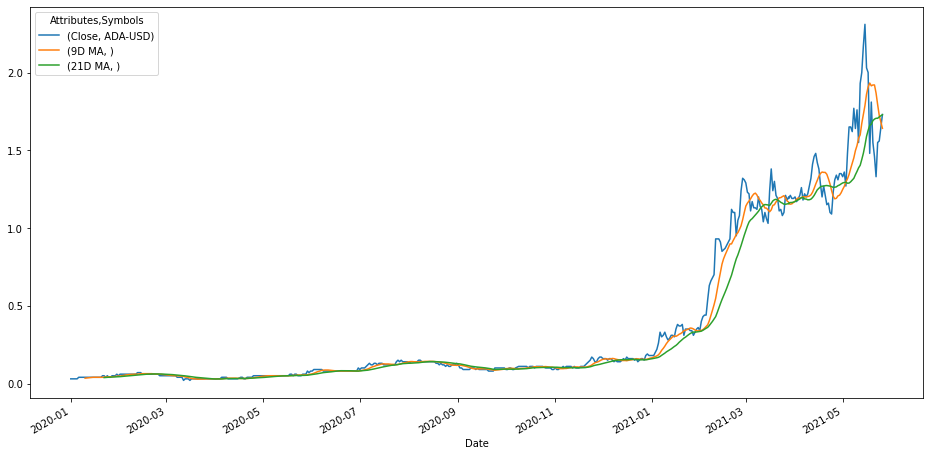

In [45]:
# plotting
ada_data[['Close', '9D MA', '21D MA']].plot(figsize=(16, 8));


In [ ]:
# error measure:
# mean absolute deviation
# ada_data['MAD9D'] = np.abs(ada_data['Close'] - ada_data['9D MA'])
# ada_data['MAD30D'] = np.abs(ada_data['Close'] - ada_data['30D MA'])

In [ ]:
# error measure:
# mean absolute percent error
# ada_data['MAPE'] = ada_data['MAD9D'] / ada_data['Close']

In [42]:
# going long on ada
ada_data['Position'] = np.where(ada_data['9D MA'] > ada_data['21D MA'], 1, 0)
# going short on ada
ada_data['Position'] = np.where(ada_data['9D MA'] < ada_data['21D MA'], -1, ada_data['Position'])


In [33]:
# tracking performance
ada_data['System'] = ada_data['Position']* ada_data['Change']

In [34]:
# checkout
ada_data.tail(3)

Attributes,Close,High,Low,Open,Volume,Change,9D MA,21D MA,Position,System
Symbols,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD,,,,,
Date,,,,,,,,,,
2021-05-23,1.55,1.60,1.27,1.32,7.365908e+09,0.153076,1.793333,1.705714,1,0.153076
2021-05-24,1.56,1.65,1.44,1.55,5.723131e+09,0.006431,1.724444,1.714762,1,0.006431
2021-05-26,1.73,1.83,1.56,1.57,6.229799e+09,0.103436,1.641111,1.728571,0,0.000000


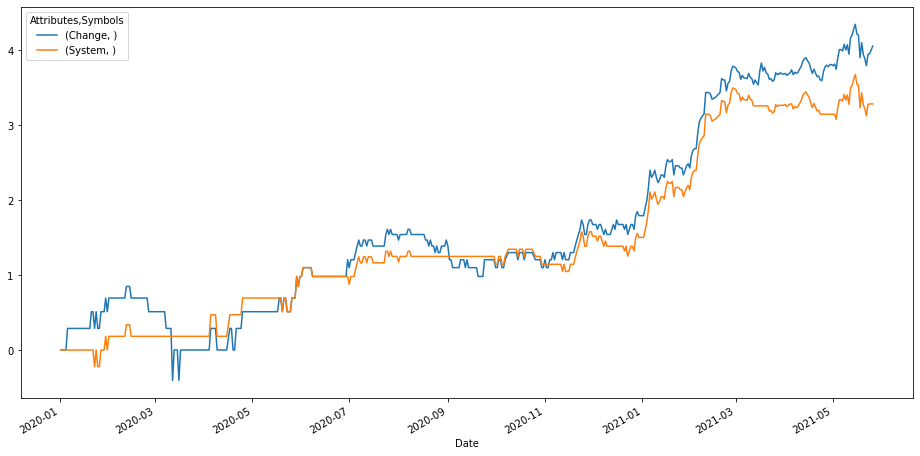

In [40]:
# testing the system vs a buy and hold approach
ada_data[['Change', 'System']].cumsum().plot(figsize=(16, 8));

In [ ]:
# conclusion:
# at the end of the day, simply buying and holding ADA at 01/01/2020 up to the current time of this writing
# would have outperformed trading the 9D and 21D moving average cross-over